## **Project Overview**

This project will conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment.

Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes. By performing a comprehensive EDA, one can reveal critical insights into factors that affect loan approvals, defaults, and overall financial risk, which is instrumental for data-driven decision making in the mortgage industry.

The primary goal of this project is to perform a thorough exploratory analysis of the Home Loan dataset.

### **Data Collection and Preparation**

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

##### **Loading datasets directly from Github into a Pandas DataFrame**

In [2]:
# url = r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

# data = pd.read_csv(url)

# # Saving & Loading the dataset locally.
# data.to_csv(r"Home_loan", index=False)

In [3]:
df = pd.read_csv(r"Home_loan")


After loading, the next thing to do is get a preview of the dataset.

In [4]:
df.head(17)       # See the first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.shape        # Number of rows and columns

(614, 13)

In [6]:
df.info()   # Column names, data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### **Inspecting for missing values, duplicates, and data type inconsistencies**

In [7]:
# Checking missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Checking for duplicates values
df.duplicated().sum()

np.int64(0)

No duplicate values in the data frame.

In [9]:
# Checking for data inconsistencies
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### **Cleaning the dataset**

In [10]:
# Making a copy of our data
data = df.copy()

In [11]:
data["Dependents"] = data["Dependents"].replace("3+", 3)

# Changing the data types
data["Dependents"] = data["Dependents"].astype("float16")
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents           float16
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [12]:
# Fill missing values in all numerical columns with their respective medians
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill missing values in all non-numerical columns with their respective modes.
mode_gender = data["Gender"].mode()[0]        # This will return the highest occurrences values therein.
data["Gender"].fillna(mode_gender, inplace=True)

mode_married = data["Married"].mode()[0]
data["Married"].fillna(mode_married, inplace=True)

mode_dependents = data["Dependents"].mode()[0]
data["Dependents"].fillna(mode_dependents, inplace=True)

mode_employed = data["Self_Employed"].mode()[0]
data["Self_Employed"].fillna(mode_employed, inplace=True)

mode_loan = data["Loan_Status"].mode()[0]
data["Loan_Status"].fillna(mode_loan, inplace=True)



C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_9644\586290301.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna(mode_gender, inplace=True)
C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_9644\586290301.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [13]:
data.head(7)

c:\Users\Welcome Sir\Desktop\abioye_olajide_tasks\a_env\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [14]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Saving the cleaned data for preprocessing

data.to_csv("EDA_clean_data.csv", index=False)

### **Exploratory Data Analysis (EDA)**

**Performing descriptive statistics to summarize the key characteristics of the data.**

In [42]:
# Descriptive Statistics of the data
data.head(3)

c:\Users\Welcome Sir\Desktop\abioye_olajide_tasks\a_env\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [47]:
# Setting Loan_ID as index
data.set_index("Loan_ID", inplace=True)

In [48]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
data.head(3)

c:\Users\Welcome Sir\Desktop\abioye_olajide_tasks\a_env\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [50]:
# Picking out the numerical columns and get the descriptions
# numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = data.select_dtypes(include='number').columns
data[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dependents,614.0,0.744141,1.009766,0.0,0.00,0.0,1.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [51]:
data.dtypes

Gender                object
Married               object
Dependents           float16
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
# Picking out the categorical columns and get their value counts

cat_col = data.select_dtypes(include='object').columns
for col in cat_col:
    print(data[col].value_counts())
    print("-------------------------")
    print("")

Gender
Male      502
Female    112
Name: count, dtype: int64
-------------------------

Married
Yes    401
No     213
Name: count, dtype: int64
-------------------------

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
-------------------------

Self_Employed
No     532
Yes     82
Name: count, dtype: int64
-------------------------

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
-------------------------

Loan_Status
Y    422
N    192
Name: count, dtype: int64
-------------------------



In [53]:
# Checking the number of loan applicants by gender
# pd.DataFrame(data["Gender"].value_counts())

In [54]:
# Checking the number of loan applicants by Education
# pd.DataFrame(data["Education"].value_counts())

In [55]:
# Checking the number of loan applicants by Property area
# pd.DataFrame(data["Property_Area"].value_counts())

**Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.**

In [56]:
# Checking for visualization of numerical features

def numerical_dist_vis(df, column):
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=df[column], kde=True, bins=30)
    plt.title(f"Histoplot of {column}: ")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    
    # Ploting box plot
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x = data[column])
    plt.title(f"Box plot for {column}")
    
    plt.tight_layout()
    plt.show()

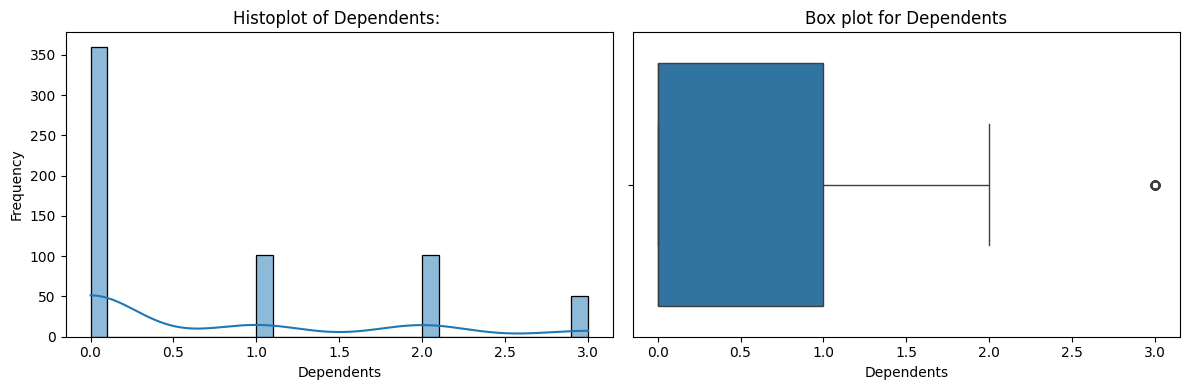

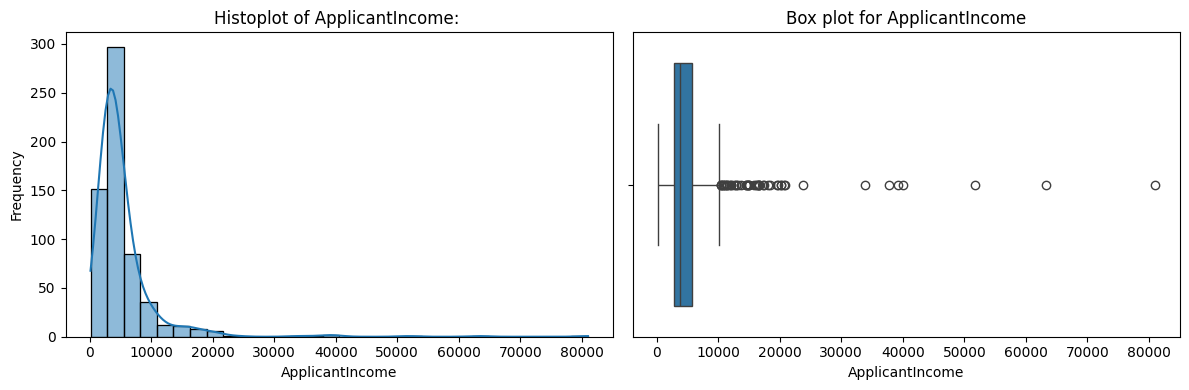

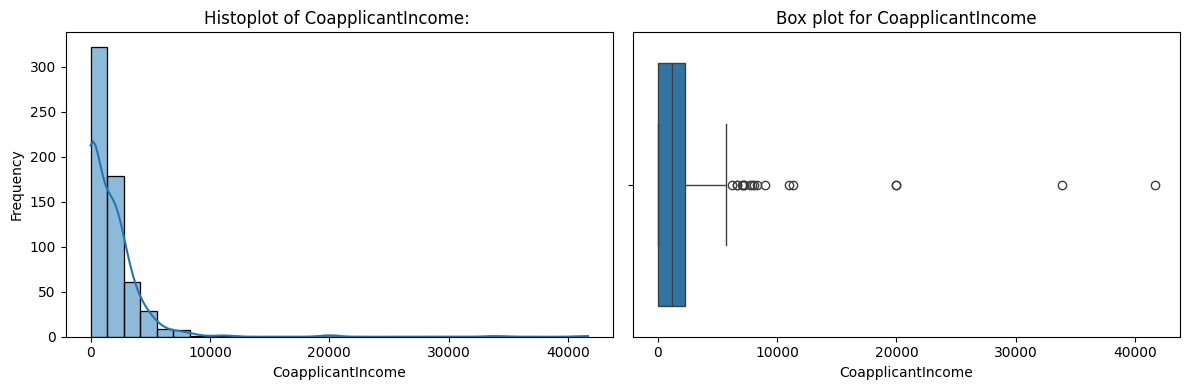

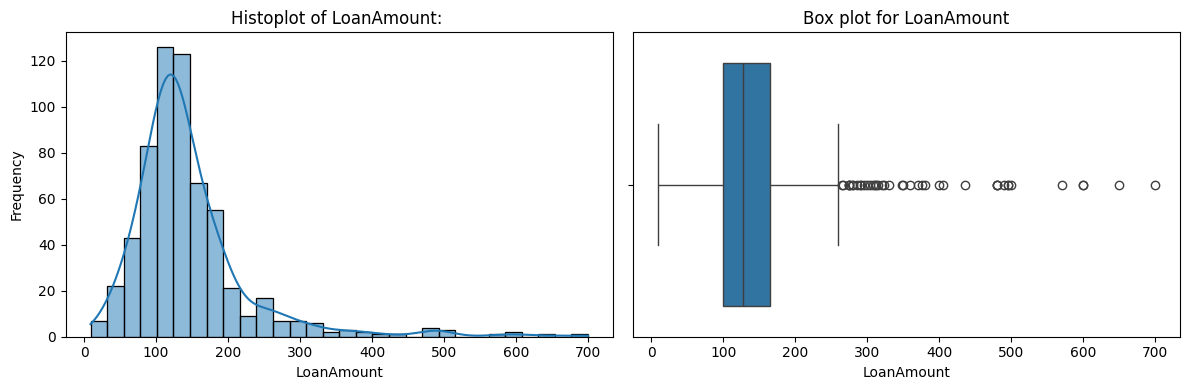

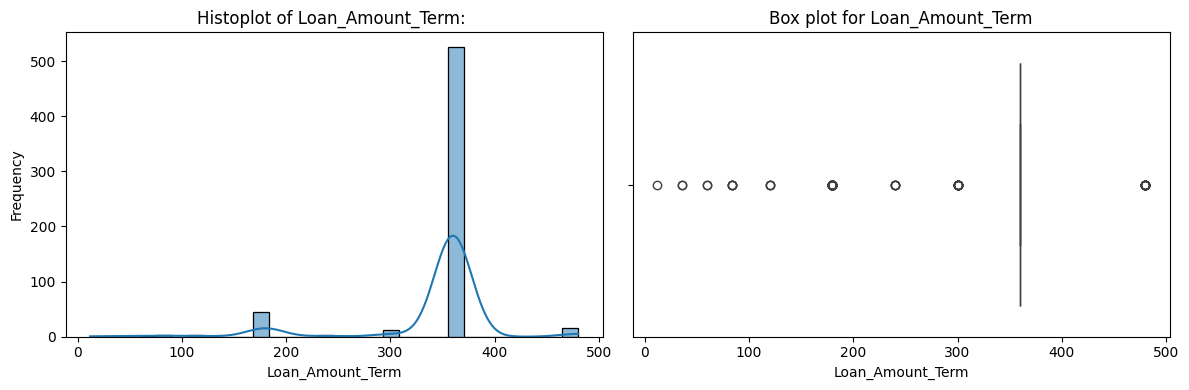

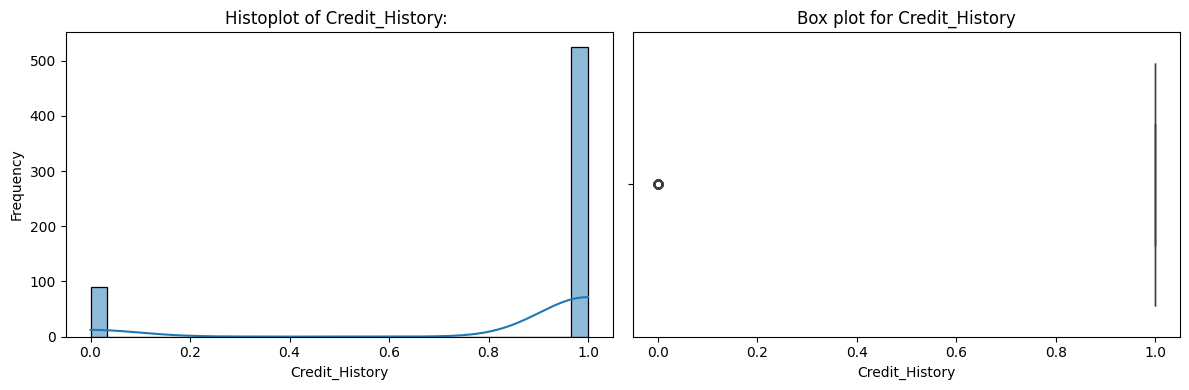

In [57]:
for col in numerical_features:
    numerical_dist_vis(data, col)

**Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.**

In [58]:
def categorical_dist_vis(data, column):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.countplot(data=data, x=column, hue=column, legend=True)
    plt.title(f"Bar plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plotting pie charts
    plt.subplot(1,2,2)
    plt.pie(x=data[column].value_counts(), labels=data[column].value_counts().index, autopct="%1.1f%%")
    plt.title(f"Pie chart of {column}")
    plt.tight_layout()
    plt.show()


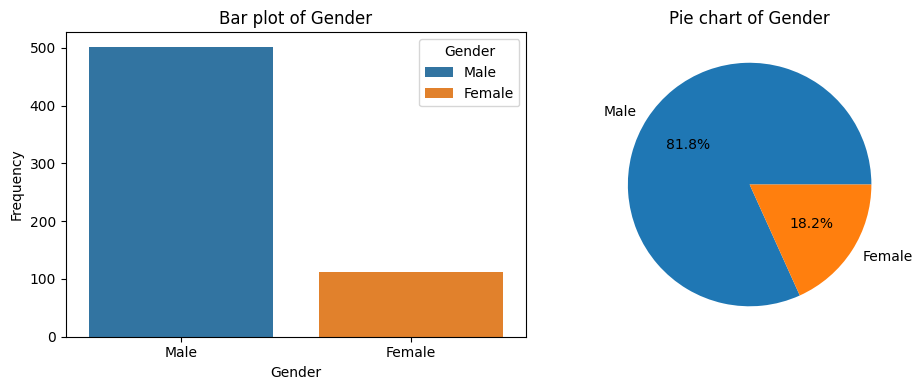

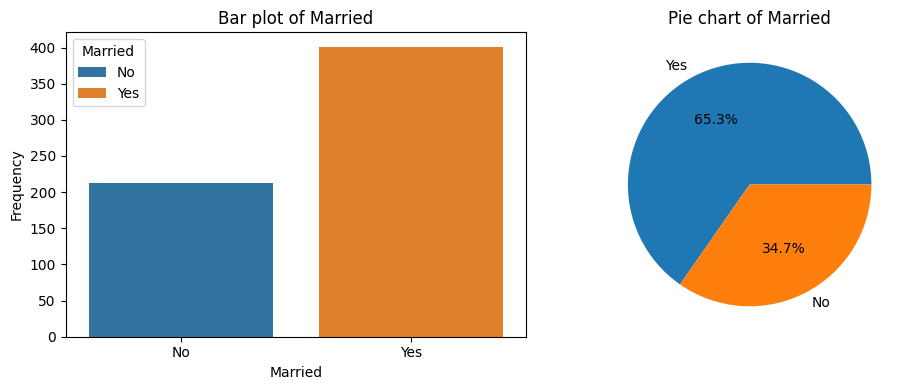

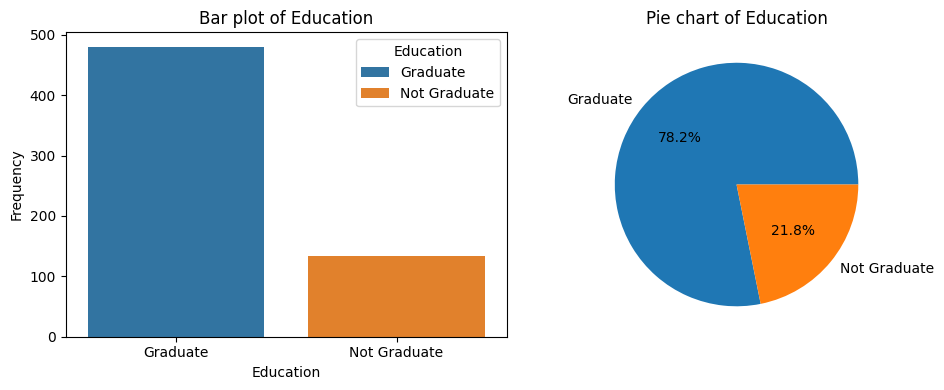

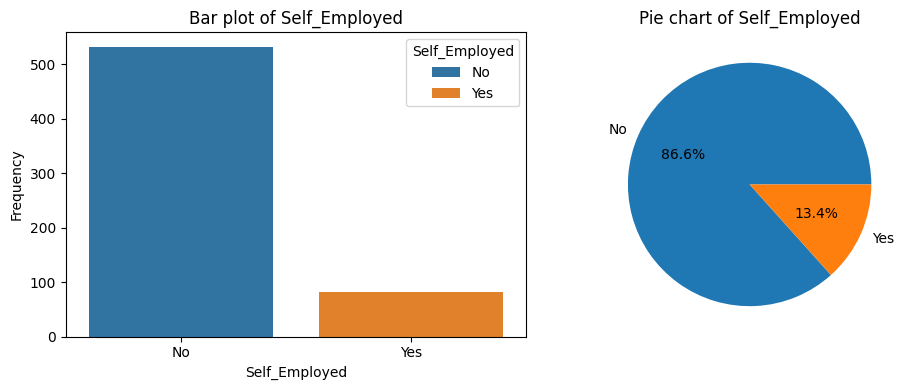

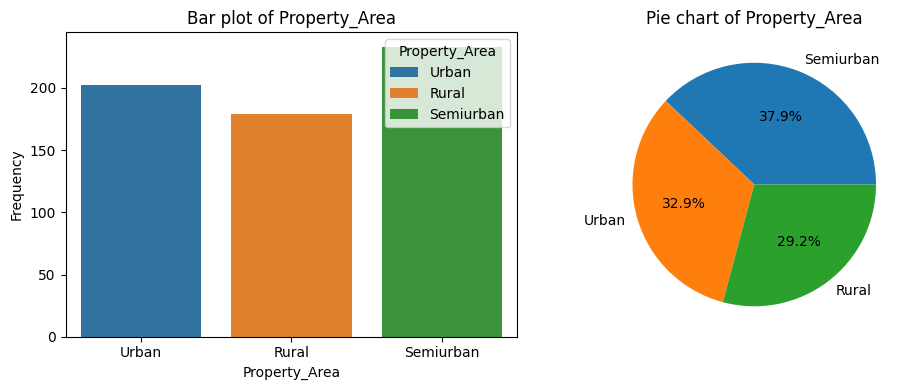

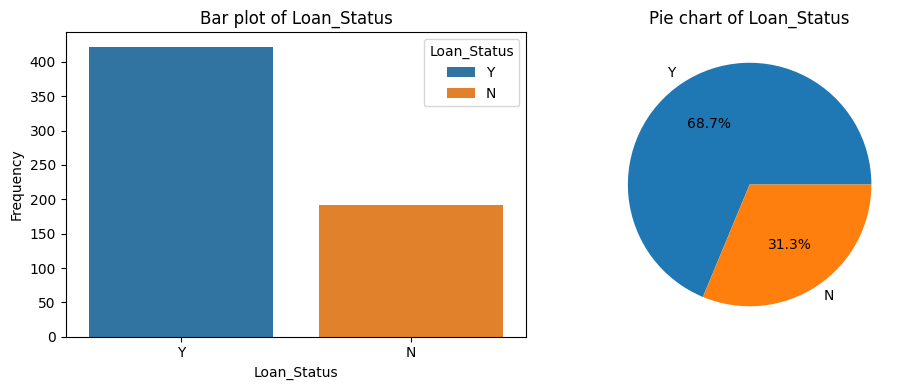

In [59]:
for col in cat_col:
    categorical_dist_vis(data, col)

**Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.**

### **Bivariate Analysis**

In [60]:
# Let make our target value a numerical column
corr_data = data.copy()
corr_data["Loan_Status"] = corr_data["Loan_Status"].map({"Y": 1, "N": 0})

In [61]:
data["Loan_Status"]

Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
           ..
LP002978    Y
LP002979    Y
LP002983    Y
LP002984    Y
LP002990    N
Name: Loan_Status, Length: 614, dtype: object

In [62]:
def correlation_with_target(data, target_col):
    """ 
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude). 
    """
    
    # Call only numeric columns and check if the target exists therein
    numerical_df = data.select_dtypes(include='number').copy()
    
    if target_col not in numerical_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numerical and present in the dataframe.")
    
    # compute correlations of every numeric column with the target
    corrs = numerical_df.corrwith(numerical_df[target_col]).drop(target_col)
    
    corrs_df = corrs.to_frame(name='corr').T
    
    plt.figure(figsize=(10,2))
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={"orientation": "vertical", "shrink":0.7}
    )
    plt.xticks(rotation=30, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numerical features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index) 

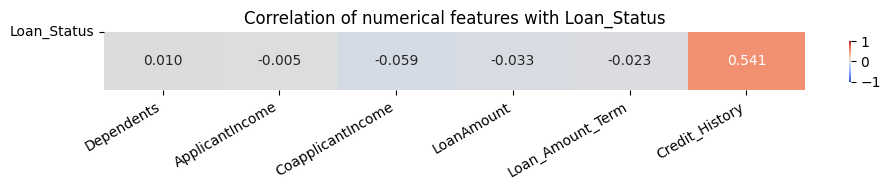

Credit_History       0.540556
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Dependents           0.010118
ApplicantIncome     -0.004710
dtype: float64


In [63]:
corr_series = correlation_with_target(corr_data, "Loan_Status")
print(corr_series)

**Observations**
- Credit history has the strongest correlation among the features with the target variable.
- Others features have a very weak correlation with the target feature.

In [64]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(data, x_col, y_col):
    """ 
    Plots the relationship between two numeric variables with a regression line 
    and displays the correlation coefficient.
    
    Parameters:
    -----------
    data : pandas.DataFrame
         Dataset containing  the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
    
    # Calculate correlation coefficient
    corr, p_value = pearsonr(data[x_col], data[y_col])
    
    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=data, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

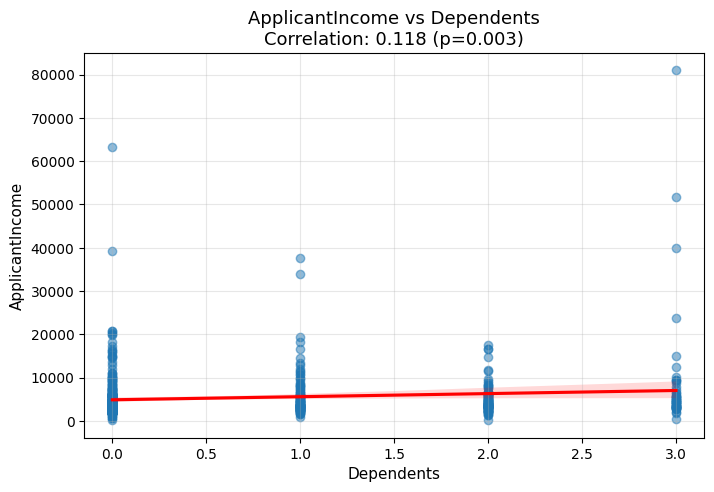

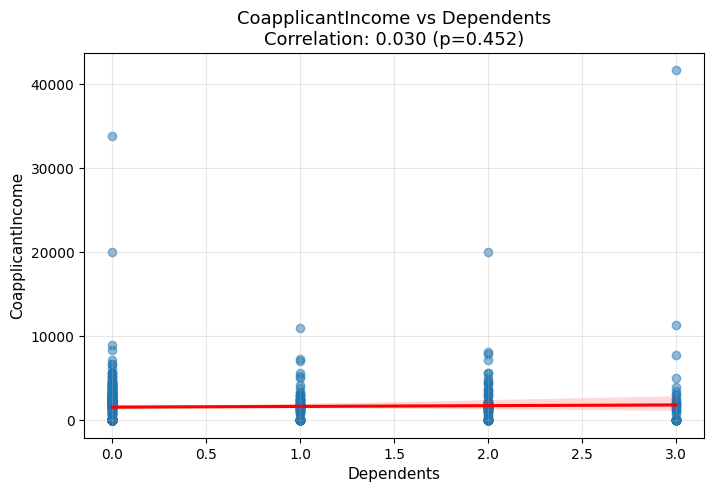

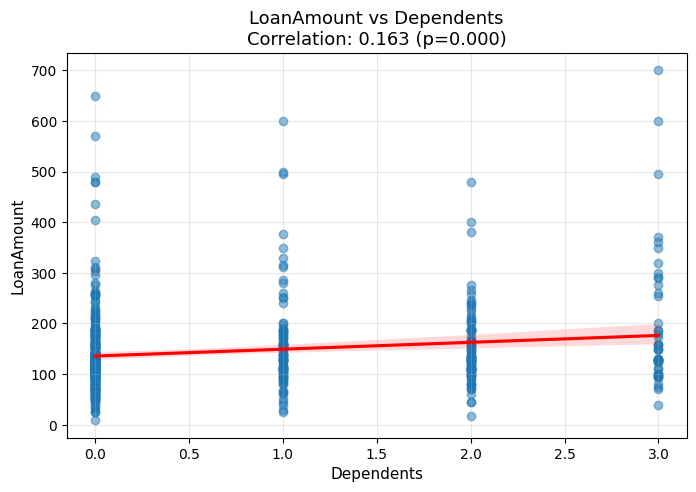

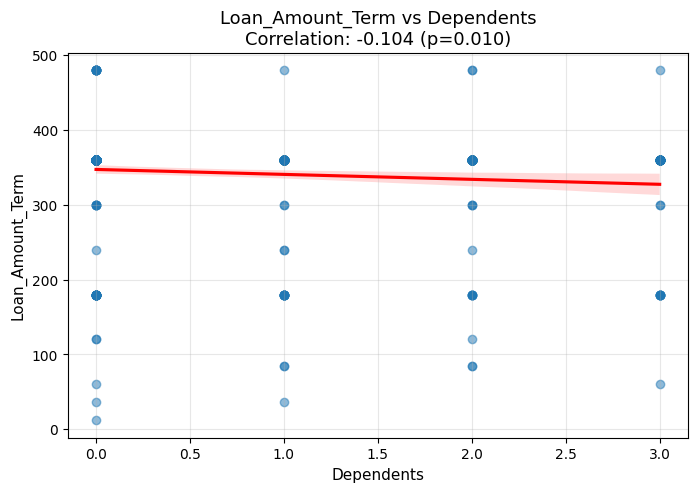

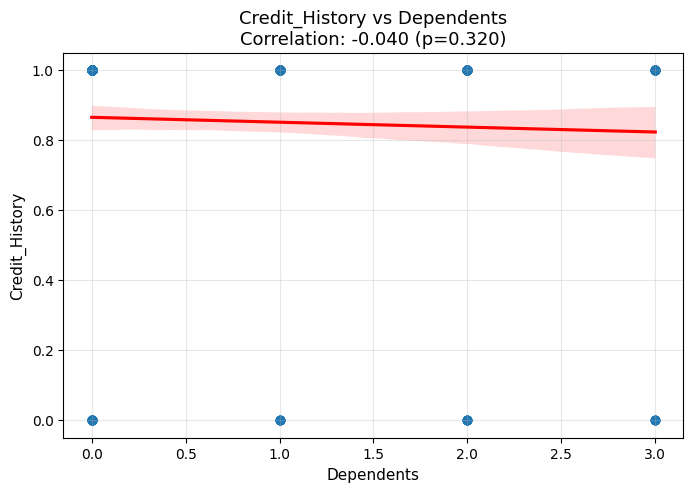

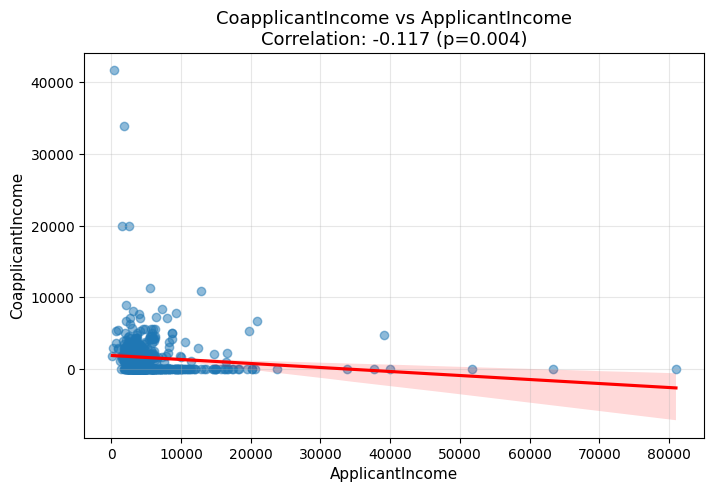

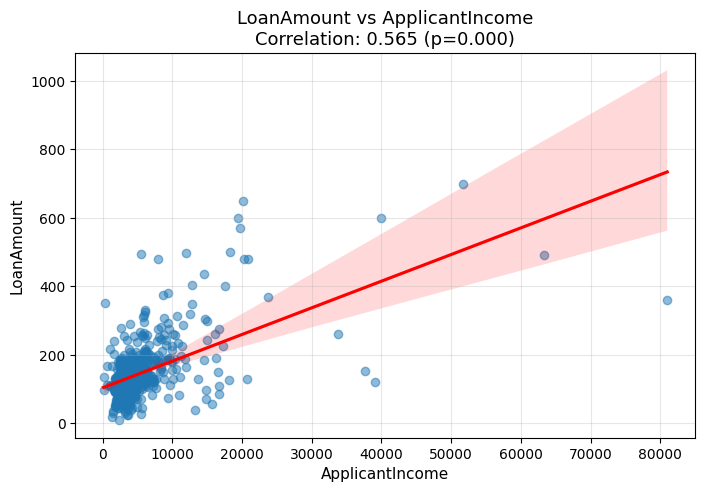

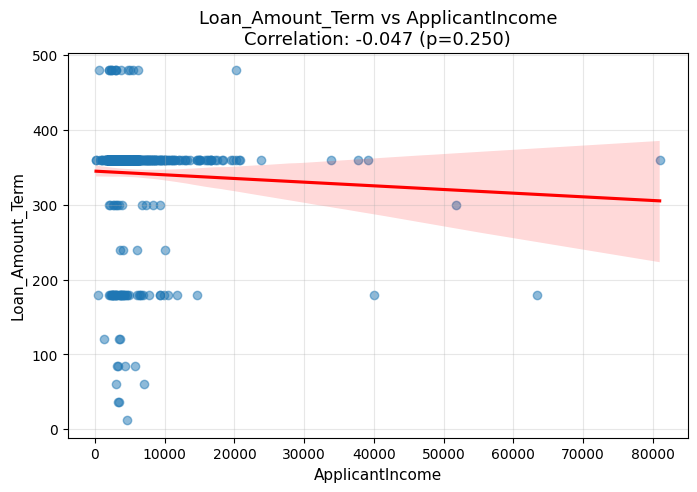

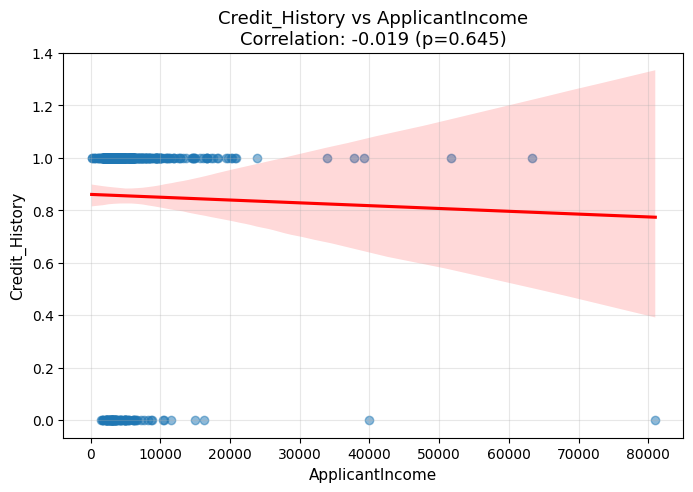

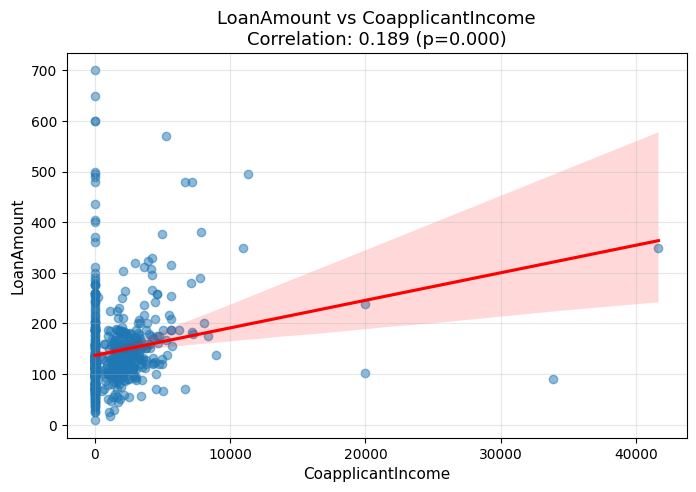

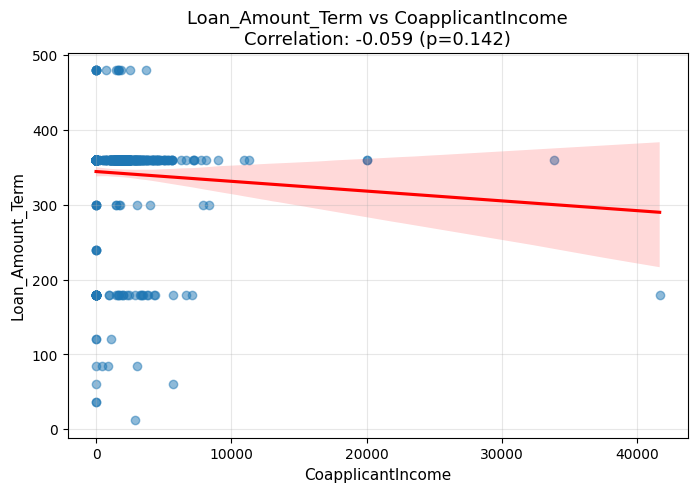

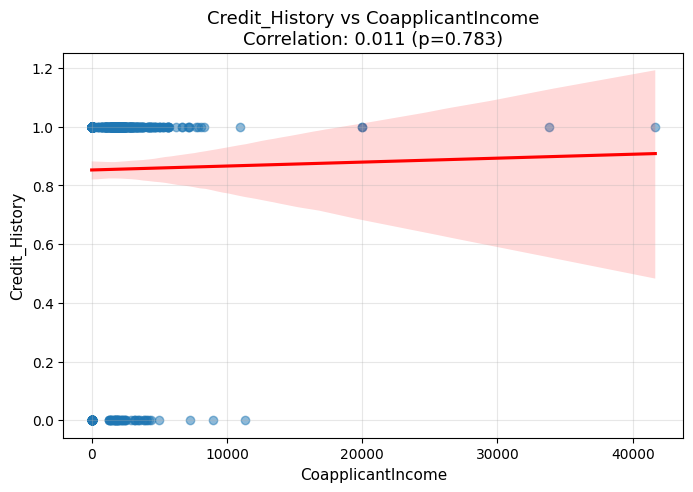

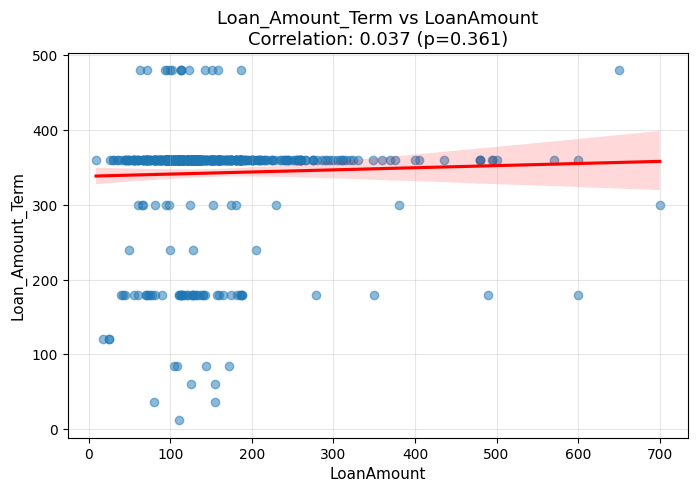

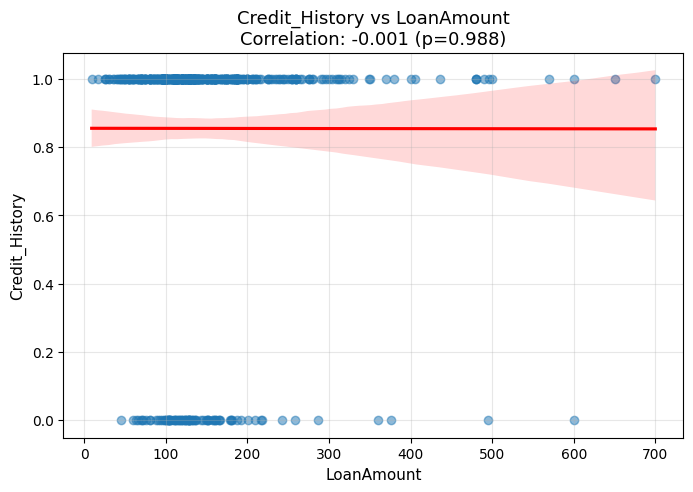

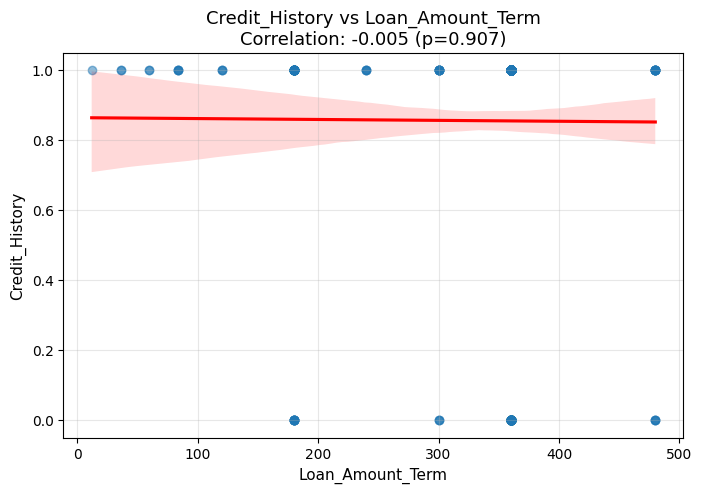

In [65]:
for i, col in enumerate(numerical_features):
    for j in range(i + 1, len(numerical_features)):
        col_2 = numerical_features[j]
        numeric_bivariate_plot(data, col, col_2)


### **Trivariate Analysis**

In [66]:
# To perform this, I need to define the function by comparing two features against the target variable

def trivariate_plot(data, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables (x_col, y_col)
    with a third target variable (loan approval status) shown by color (hue)
    
    Parameters
    ----------
    data : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The target feature (color grouping).
    """
    
    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=data,
        x=x_col,
        y=y_col,
        hue=hue_col,
        height=6,
        aspect=1.2,
        scatter_kws={'alpha':0.6},
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

**Identify trends, anomalies, and patterns that could impact loan outcomes.**

<Figure size 800x600 with 0 Axes>

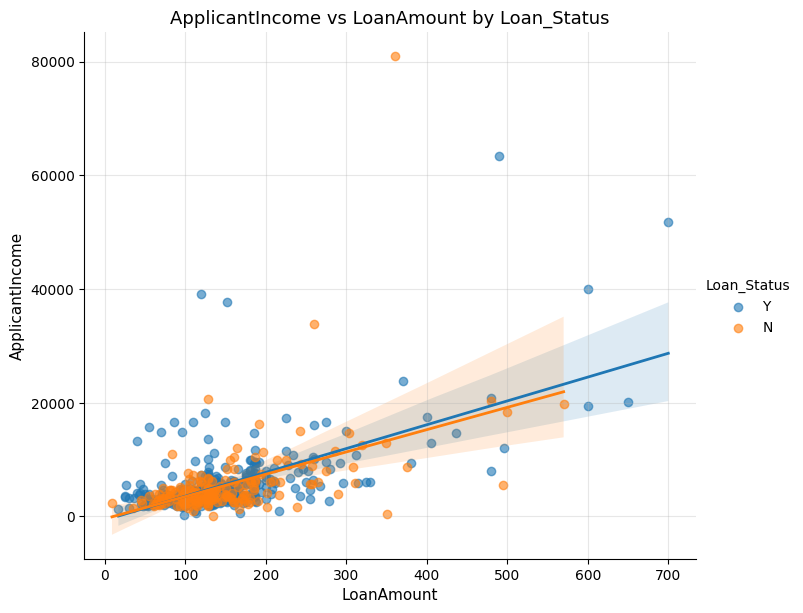

In [67]:
trivariate_plot(data, "LoanAmount", "ApplicantIncome", "Loan_Status")

### **Reporting and Insights**

**Summarize key findings and insights derived from the EDA.**

In [68]:
report_url = r"https://docs.google.com/document/d/1UZ2PbeUUb9BebScX2CGmQgNh62PMzqqrGXFiWFwkuSc/edit?tab=t.0"

**Create comprehensive visualizations and dashboards to communicate your insights effectively.**

### **Performing BaseLine Model**

In [73]:
num_col = data.select_dtypes(include='number').columns
num_col

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [78]:
def col_num(data, column):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=data[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=data[column])
    plt.tight_layout()
    plt.show()

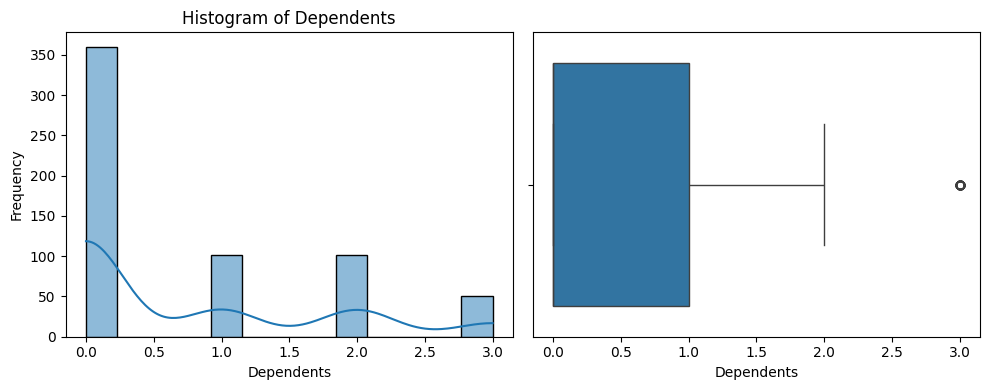

In [79]:
col_num(data, "Dependents")